p.229

In [1]:
# コード 15.1 ファイルからデータを抽出
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, m = line.split(' ')
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)

In [2]:
import pylab

In [3]:
# コード 15.2 データをプロット
def plotData(inputFile):
    pylab.figure(dpi=125)
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')

p.230

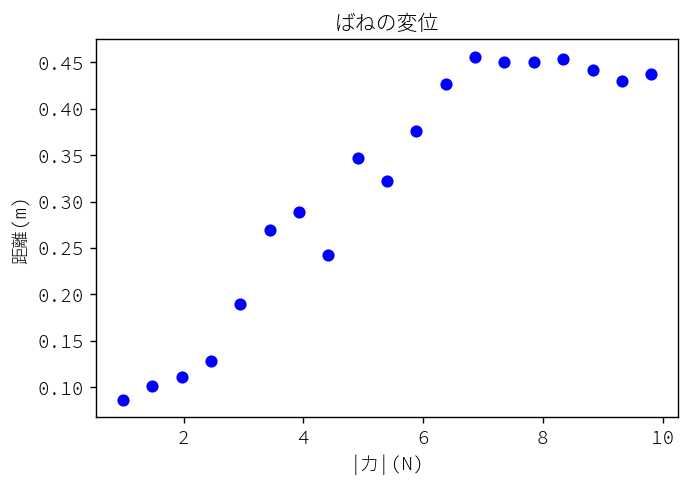

In [4]:
# 図15.2 実験結果のプロット
plotData('springData.txt')

p.231

In [5]:
# コード 15.3 データに曲線を適合
def fitData(inputFile):
    pylab.figure(dpi=125)
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')
    
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a * pylab.array(forces) + b
    k = 1.0 / a
    pylab.plot(forces, predictedDistances, label = u'1次適合による変位の予測\nk = ' + str(round(k, 5)))
    pylab.legend(loc = 'best')

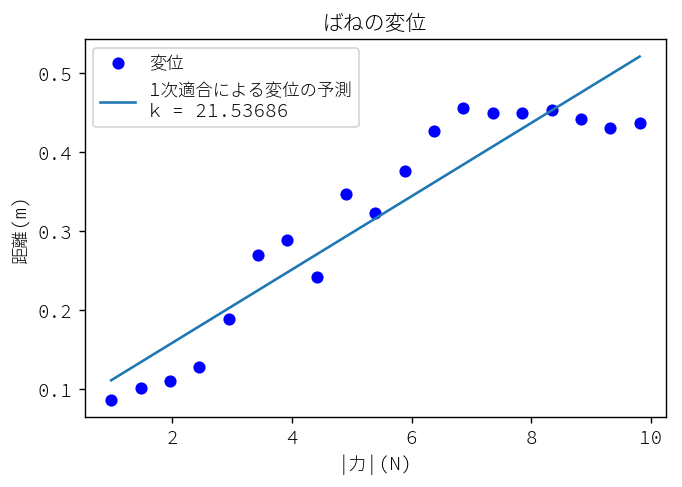

In [6]:
# 図15.3 直線へのデータの適合
fitData('springData.txt')

In [7]:
def fitData(inputFile):
    pylab.figure(dpi=125)
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')
    
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a * pylab.array(forces) + b
    k = 1.0 / a
    pylab.plot(forces, predictedDistances, label = u'1次適合による変位の予測\nk = ' + str(round(k, 5)))

    # 3次の適合曲線を求める
    a, b, c, d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a * forces ** 3 + b * forces ** 2 + c * forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = u'3次適合')
    
    pylab.legend(loc = 'best')

p.233

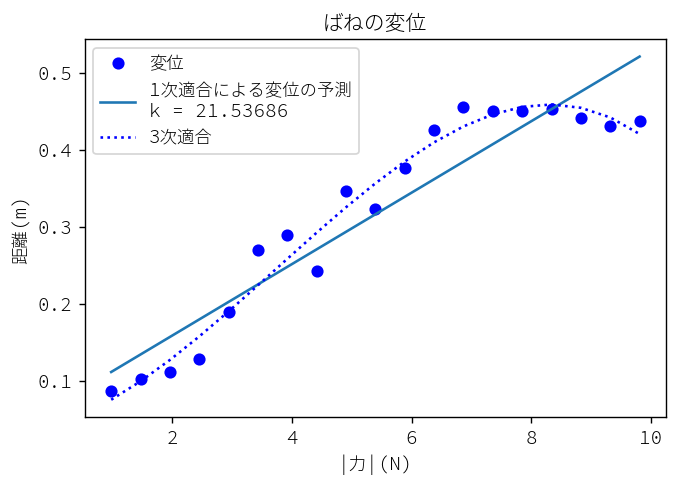

In [8]:
# 図15.4 3時間数への適合を追加(点線)
fitData('springData.txt')

p.234

In [9]:
# 指練習
def fitData(inputFile):
    pylab.figure(dpi=125)
    masses, distances = getData(inputFile)
    masses = pylab.array(masses)
    distances = pylab.array(distances)
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')

    # 3次の適合曲線を求める
    a, b, c, d = pylab.polyfit(forces, distances, 3)
    xes = pylab.array(range(1, 15))
    predictedDistances = a * xes ** 3 + b * xes ** 2 + c * xes + d
    pylab.plot(xes, predictedDistances, 'b:', label = u'3次適合')
    pylab.xlim(0, 16)
    
    pylab.legend(loc = 'best')

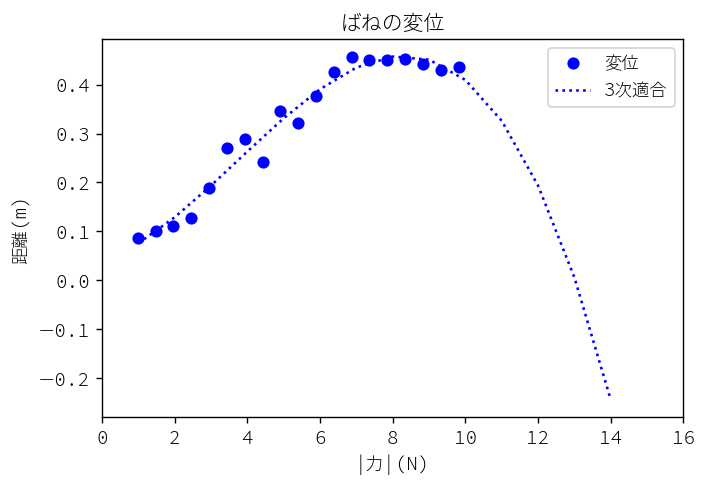

In [10]:
# 図15.5 過剰適合の例
fitData('springData.txt')

In [11]:
def fitData(inputFile):
    pylab.figure(dpi=125)
    masses, distances = getData(inputFile)
    masses = pylab.array(masses[:-6])
    distances = pylab.array(distances[:-6])
    forces = masses * 9.81
    pylab.plot(forces, distances, 'bo', label = u'変位')
    pylab.title(u'ばねの変位')
    pylab.xlabel(u'|力|(N)')
    pylab.ylabel(u'距離(m)')
    
    # 1次の適合曲線(直線)を求める
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a * pylab.array(forces) + b
    k = 1.0 / a
    pylab.plot(forces, predictedDistances, label = u'1次適合による変位の予測\nk = ' + str(round(k, 5)))

    # 3次の適合曲線を求める
    a, b, c, d = pylab.polyfit(forces, distances, 3)
    predictedDistances = a * forces ** 3 + b * forces ** 2 + c * forces + d
    pylab.plot(forces, predictedDistances, 'b:', label = u'3次適合')
    
    pylab.legend(loc = 'best')

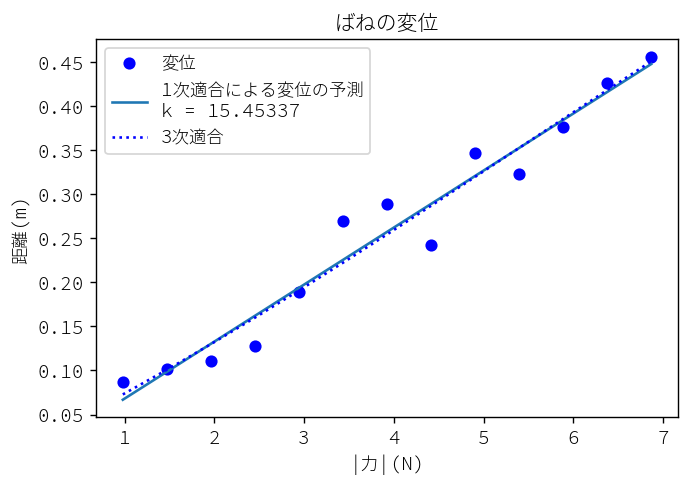

In [12]:
# 図15.6 6つのデータを除いた後の線形関数と3次関数による適合
fitData('springData.txt')

p.236

In [13]:
# コード 15.4 発射体の軌跡の描画
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    heights1, heights2, heights3, heights4 = [], [], [], []
    discardHeader = dataFile.readline()
    for line in dataFile:
        d, h1, h2, h3, h4 = line.split()
        distances.append(float(d))
        heights1.append(float(h1))
        heights2.append(float(h2))
        heights3.append(float(h3))
        heights4.append(float(h4))
    dataFile.close()
    return (distances, [heights1, heights2, heights3, heights4])

In [14]:
def processTrajectories(fileName):
    pylab.figure(dpi=125)
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における平均高さをもつ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights / len(heights)
    
    pylab.title(u'発射体の軌跡(' + str(numTrials) + u'回試行の平均)')
    pylab.xlabel(u'発射地点からの距離(インチ)')
    pylab.ylabel(u'発射地点からの高さ(インチ)')
    pylab.plot(distances, meanHeights, 'bo')
    
    a, b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a * distances + b
    pylab.plot(distances, altitudes, 'b', label = u'1次適合')
    
    a, b, c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a * distances * distances + b * distances + c
    pylab.plot(distances, altitudes, 'b:', label = u'2次適合')
    pylab.legend()

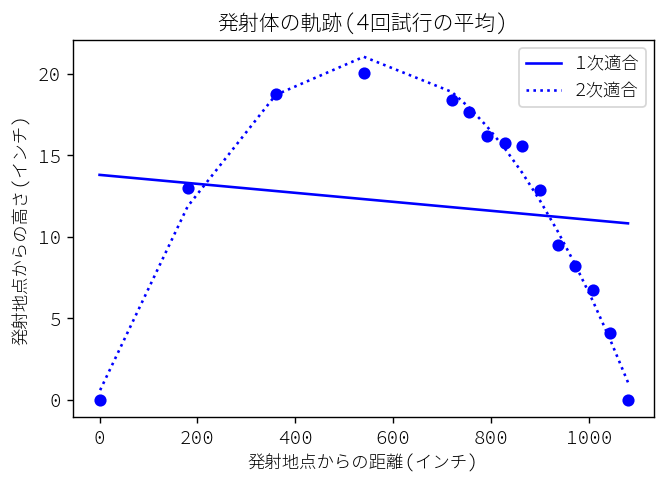

In [15]:
# 図 15.7 発射体の軌跡に対する線形関数と2次関数による適合
processTrajectories('trajectoryData.txt')

p.237

In [16]:
# コード 15.5 R^2の計算
def rSquared(measured, predicted):
    """measuredは観測値を保持する1次元配列
       predictedは予測値を保持する1次元の配列と仮定する
       決定係数を返す"""
    estimateError = ((predicted - measured) ** 2).sum()
    meanOfMeasured = measured.sum() / float(len(measured))
    variability = ((measured - meanOfMeasured) ** 2).sum()
    return 1 - estimateError / variability

In [17]:
def processTrajectories(fileName):
    pylab.figure(dpi=125)
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における平均高さをもつ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights / len(heights)
    pylab.title(u'発射体の軌跡(' + str(numTrials) + u'回試行の平均)')
    pylab.xlabel(u'発射地点からの距離(インチ)')
    pylab.ylabel(u'発射地点からの高さ(インチ)')
    pylab.plot(distances, meanHeights, 'bo')

    a, b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a * distances + b
    print '1次適合のR^2 = ' + str(rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b', label = u'1次適合')
    
    a, b, c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a * distances * distances + b * distances + c
    print '2次適合のR^2 = ' + str(rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b:', label = u'2次適合')
    pylab.legend()

1次適合のR^2 = 0.0177433205440769
2次適合のR^2 = 0.9857653692869693


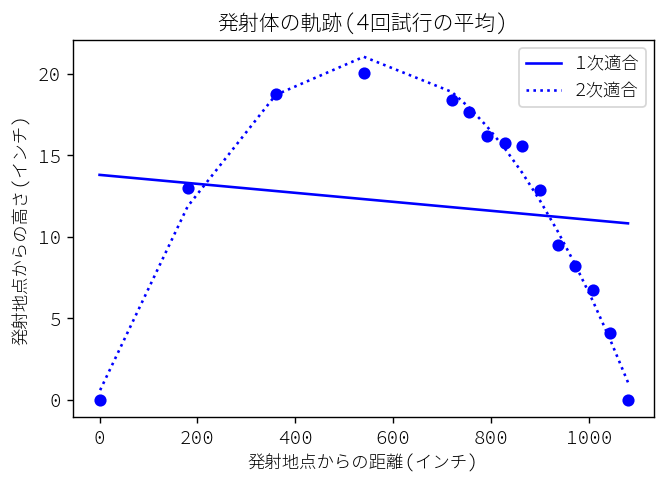

In [18]:
processTrajectories('trajectoryData.txt')

p.239

In [19]:
# コード 15.6 発射体の水平方向の速度の計算
def getHorizontalSpeed(a, b, c, minX, maxX):
    """minXとmaxXをインチ単位の距離と仮定する
       水平方向の速度を返す(単位はフィート/秒)"""
    inchesPerFoot = 12.0
    xMid = (maxX - minX) / 2.0
    yPeak = a * xMid ** 2 + b * xMid + c
    g = 32.16 * inchesPerFoot # インチ/秒/秒単位での重力加速度
    t = (2 * yPeak / g) ** 0.5
    print '水平速度 = ' + str(int(xMid / (t * inchesPerFoot))) + 'フィート/秒'

In [20]:
def processTrajectories(fileName):
    pylab.figure(dpi=125)
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    # 各距離における平均高さをもつ配列を得る
    totHeights = pylab.array([0] * len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights / len(heights)
    pylab.title(u'発射体の軌跡(' + str(numTrials) + u'回試行の平均)')
    pylab.xlabel(u'発射地点からの距離(インチ)')
    pylab.ylabel(u'発射地点からの高さ(インチ)')
    pylab.plot(distances, meanHeights, 'bo')

    a, b = pylab.polyfit(distances, meanHeights, 1)
    altitudes = a * distances + b
    print '1次適合のR^2 = ' + str(rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b', label = u'1次適合')
    
    a, b, c = pylab.polyfit(distances, meanHeights, 2)
    altitudes = a * distances * distances + b * distances + c
    print '2次適合のR^2 = ' + str(rSquared(meanHeights, altitudes))
    pylab.plot(distances, altitudes, 'b:', label = u'2次適合')
    pylab.legend()
    getHorizontalSpeed(a, b, c, distances[-1], distances[0])

1次適合のR^2 = 0.0177433205440769
2次適合のR^2 = 0.9857653692869693
水平速度 = 136フィート/秒


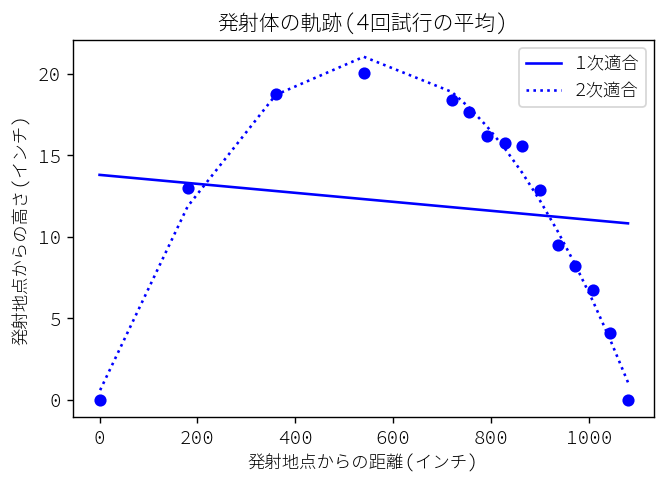

In [21]:
processTrajectories('trajectoryData.txt')

p.240

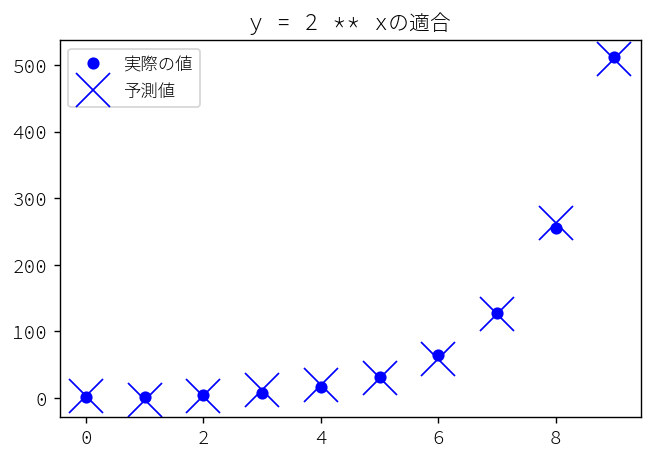

In [22]:
# コード 15.7 指数関数に従うデータへの多項式曲線の適合
# 図 15.6
pylab.figure(dpi=125)
vals = []
for i in range(10):
    vals.append(2 ** i)
pylab.plot(vals, 'bo', label = u'実際の値')
xVals = pylab.arange(10)
a, b, c, d, e = pylab.polyfit(xVals, vals, 4)
yVals = a * (xVals ** 4) + b * (xVals ** 3) + c * (xVals ** 2) + d * xVals + e
pylab.plot(yVals, 'bx', label = u'予測値', markersize = 20)
pylab.title(u'y = 2 ** xの適合')
pylab.legend()

2 ** 20のモデルの大雑把な予測29796.0
2 ** 20の実際の値1048576


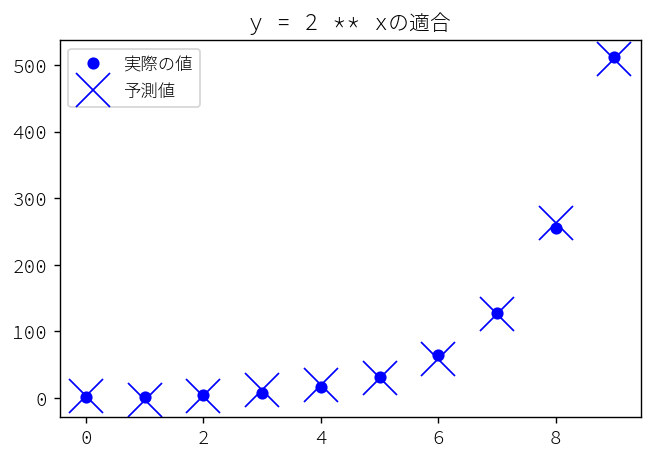

In [23]:
pylab.figure(dpi=125)
vals = []
for i in range(10):
    vals.append(2 ** i)
pylab.plot(vals, 'bo', label = u'実際の値')
xVals = pylab.arange(10)
a, b, c, d, e = pylab.polyfit(xVals, vals, 4)
yVals = a * (xVals ** 4) + b * (xVals ** 3) + c * (xVals ** 2) + d * xVals + e
pylab.plot(yVals, 'bx', label = u'予測値', markersize = 20)
pylab.title(u'y = 2 ** xの適合')
pylab.legend()
pred2to20 = a * (20 ** 4) + b * (20 ** 3) + c * (20 ** 2) + d * 20 + e
print '2 ** 20のモデルの大雑把な予測' + str(round(pred2to20))
print '2 ** 20の実際の値' + str(2 ** 20)

p.241

[]

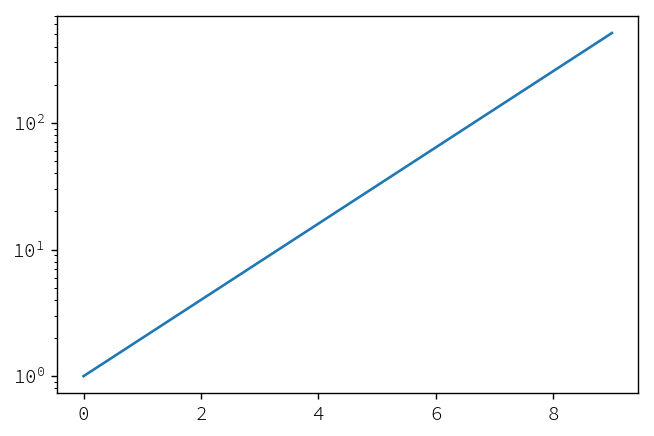

In [24]:
# 図15.9 y軸を対数目盛とした指数関数のプロット
pylab.figure(dpi=125)
xVals, yVals = [], []
for i in range(10):
    xVals.append(i)
    yVals.append(2 ** i)
pylab.plot(xVals, yVals)
pylab.semilogy()

f(20) = 50331648.0
予測 f(20) = 50331647.999999814


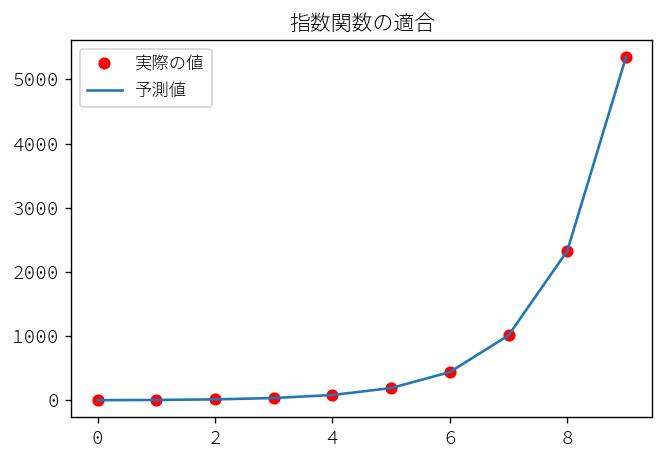

In [25]:
# コード 15.8 polyfitを用いた指数関数に従うデータの適合
# 図 15.10 polyfitを用いた指数関数に従うデータの適合
import math

# 任意の指数関数を定義する
def f(x):
    return 3 * (2 ** (1.2 * x))

def createExpData(f, xVals):
    """fを引数を1つ持つ指数関数と仮定する
       xValsを、fの適当な引数を持つ配列とする
       xValsの要素に関数fを適用した結果を保持する配列を返す"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return pylab.array(xVals), pylab.array(yVals)

def fitExpData(xVals, yVals):
    """xValsとyValsを
       yVals[i] == f(xVals[i])となる数を保持する配列と仮定する
       log(f(x), base) == ax + bを満たすa, bを返す"""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) # 底が2の対数
    a, b = pylab.polyfit(xVals, logVals, 1)
    return a, b, 2.0

pylab.figure(dpi=125)
xVals, yVals = createExpData(f, range(10))
pylab.plot(xVals, yVals, 'ro', label = u'実際の値')
a, b, base = fitExpData(xVals, yVals)
preditedYVals = []
for x in xVals:
    preditedYVals.append(base ** (a * x + b))
pylab.plot(xVals, preditedYVals, label = u'予測値')
pylab.title(u'指数関数の適合')
pylab.legend()
# オリジナルのデータにはないxの値を調べる
print 'f(20) =', f(20)
print u'予測 f(20) =', base ** (a * 20 + b)

p.243

f(20) = 50331668.0
予測 f(20) = 44846543.49094651


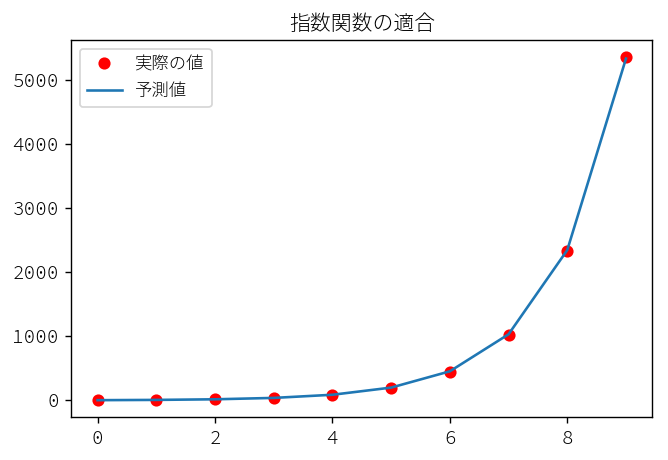

In [26]:
# 任意の指数関数を定義する
def f(x):
    return 3 * (2 ** (1.2 * x)) + x

def createExpData(f, xVals):
    """fを引数を1つ持つ指数関数と仮定する
       xValsを、fの適当な引数を持つ配列とする
       xValsの要素に関数fを適用した結果を保持する配列を返す"""
    yVals = []
    for i in range(len(xVals)):
        yVals.append(f(xVals[i]))
    return pylab.array(xVals), pylab.array(yVals)

def fitExpData(xVals, yVals):
    """xValsとyValsを
       yVals[i] == f(xVals[i])となる数を保持する配列と仮定する
       log(f(x), base) == ax + bを満たすa, bを返す"""
    logVals = []
    for y in yVals:
        logVals.append(math.log(y, 2.0)) # 底が2の対数
    a, b = pylab.polyfit(xVals, logVals, 1)
    return a, b, 2.0

pylab.figure(dpi=125)
xVals, yVals = createExpData(f, range(10))
pylab.plot(xVals, yVals, 'ro', label = u'実際の値')
a, b, base = fitExpData(xVals, yVals)
preditedYVals = []
for x in xVals:
    preditedYVals.append(base ** (a * x + b))
pylab.plot(xVals, preditedYVals, label = u'予測値')
pylab.title(u'指数関数の適合')
pylab.legend()
# オリジナルのデータにはないxの値を調べる
print 'f(20) =', f(20)
print u'予測 f(20) =', base ** (a * 20 + b)